**Linear Regression**

# **EDA**

In [4161]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [4162]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## **Develop a predictive model  to forecast the next day's stock market closing price based on historical data,**

## **including open, high, low, volume, and adjusted close price to aid in informed decision-making.**
 
 
## **he following steps has to be performed for a complete analysis and evaluation.**


**1. Hybrid Model: A combination of LSTM and Linear Regression.**
 
**2. Advanced Hybrid Model: A combination of Linear Regression, LSTM, SVR, and Random Forest.**
 
**3. Voting  Regression: An ensemble approach integrating the models from the second step.**

In [ ]:
df=pd.read_csv("apple_stock_data - apple_stock_data.csv")
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-11-02 00:00:00+00:00,176.665985,177.570007,177.779999,175.460007,175.520004,77334800
1,2023-11-03 00:00:00+00:00,175.750671,176.649994,176.820007,173.350006,174.240005,79763700
2,2023-11-06 00:00:00+00:00,178.317520,179.229996,179.429993,176.210007,176.380005,63841300
3,2023-11-07 00:00:00+00:00,180.894333,181.820007,182.440002,178.970001,179.179993,70530000
4,2023-11-08 00:00:00+00:00,181.958893,182.889999,183.449997,181.589996,182.350006,49340300
...,...,...,...,...,...,...,...
247,2024-10-28 00:00:00+00:00,233.399994,233.399994,234.729996,232.550003,233.320007,36087100
248,2024-10-29 00:00:00+00:00,233.669998,233.669998,234.330002,232.320007,233.100006,35417200
249,2024-10-30 00:00:00+00:00,230.100006,230.100006,233.470001,229.550003,232.610001,47070900
250,2024-10-31 00:00:00+00:00,225.910004,225.910004,229.830002,225.369995,229.339996,64370100


In [1]:
df.head()

NameError: name 'df' is not defined

In [ ]:
df.tail()

,Date,Adj Close,Close,High,Low,Open,Volume
247,2024-10-28 00:00:00+00:00,233.399994,233.399994,234.729996,232.550003,233.320007,36087100
248,2024-10-29 00:00:00+00:00,233.669998,233.669998,234.330002,232.320007,233.100006,35417200
249,2024-10-30 00:00:00+00:00,230.100006,230.100006,233.470001,229.550003,232.610001,47070900
250,2024-10-31 00:00:00+00:00,225.910004,225.910004,229.830002,225.369995,229.339996,64370100
251,2024-11-01 00:00:00+00:00,222.910004,222.910004,225.350006,220.270004,220.970001,65242200


In [ ]:
df.shape

(252, 7)

In [ ]:
df.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,199.088202,199.454286,201.093056,197.608373,199.316031,5.832214e+07
std,21.511933,21.321567,21.571427,20.963034,21.365476,3.025771e+07
min,164.585998,165.000000,166.399994,164.080002,165.350006,2.404830e+07
25%,182.254063,182.852501,184.617504,181.487499,182.777504,4.278855e+07
50%,192.370026,193.084999,194.399994,191.724998,192.989998,5.174865e+07
75%,221.697502,221.697502,224.149994,219.717499,221.635002,6.497460e+07
max,236.479996,236.479996,237.490005,234.449997,236.479996,3.186799e+08


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Adj Close  252 non-null    float64
 2   Close      252 non-null    float64
 3   High       252 non-null    float64
 4   Low        252 non-null    float64
 5   Open       252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [ ]:
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-11-02 00:00:00+00:00,176.665985,177.570007,177.779999,175.460007,175.520004,77334800
1,2023-11-03 00:00:00+00:00,175.750671,176.649994,176.820007,173.350006,174.240005,79763700
2,2023-11-06 00:00:00+00:00,178.317520,179.229996,179.429993,176.210007,176.380005,63841300
3,2023-11-07 00:00:00+00:00,180.894333,181.820007,182.440002,178.970001,179.179993,70530000
4,2023-11-08 00:00:00+00:00,181.958893,182.889999,183.449997,181.589996,182.350006,49340300
...,...,...,...,...,...,...,...
247,2024-10-28 00:00:00+00:00,233.399994,233.399994,234.729996,232.550003,233.320007,36087100
248,2024-10-29 00:00:00+00:00,233.669998,233.669998,234.330002,232.320007,233.100006,35417200
249,2024-10-30 00:00:00+00:00,230.100006,230.100006,233.470001,229.550003,232.610001,47070900
250,2024-10-31 00:00:00+00:00,225.910004,225.910004,229.830002,225.369995,229.339996,64370100


In [ ]:
df.set_index('Date', inplace=True)

In [ ]:
corr=df.corr()

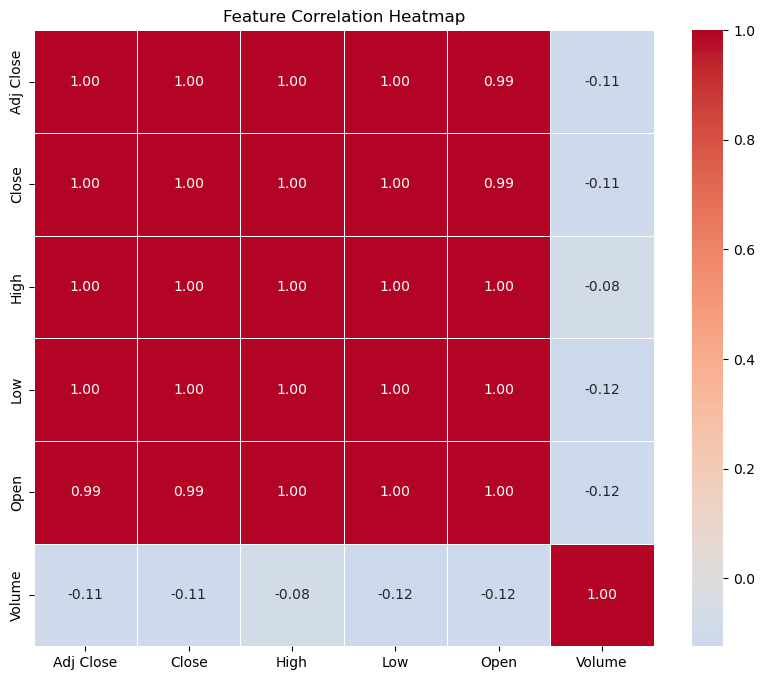

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, center=0, fmt=".2f", cmap="coolwarm",linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [ ]:
# columns=['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# for i, col in enumerate(columns):
#     df.boxplot(columns=col)
#     plt.title(f'Box Plot of {col}')
#     plt.show()


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# columns = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# for col in columns:
#     df.boxplot(column=col)  # Corrected 'column' instead of 'columns'
#     plt.title(f'Box Plot of {col}')
#     plt.show()


In [ ]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

# **MODEL1**

## APROCH1

In [4179]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

model=LinearRegression()

In [4180]:
x=df.drop(columns="Close")
y=df[["Close"]]

In [4181]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [4182]:
x_scale=scaler.fit_transform(x)
y_scaled=scaler.fit_transform(y)

In [4183]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scaled, test_size=0.2, random_state=42)

In [4184]:
print(x_train.shape)

(201, 5)


In [4185]:
y_train.shape

(201, 1)

In [4186]:
model.fit(x_train,y_train)

LinearRegression()

In [4187]:
y_pred_lr=model.predict(x_test)

In [4188]:
# y_test_actual = scaler.inverse_transform(y_test.values.reshape(-1,1))
# y_pred_hybrid_actual = scaler.inverse_transform(y_pred_lr.reshape(-1,1))

In [4189]:
mae_lr1 = mean_absolute_error(y_test, y_pred_lr)
rmse_lr1 = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr1 = r2_score(y_test, y_pred_lr)

print(f'MAE  _lr1 :' ,mae_lr1)
print(f'RMSE _lr1:' ,rmse_lr1)
print(f'R2   _lr1: '  ,r2_lr1)

MAE  _lr1 : 0.002459694721414236
RMSE _lr1: 0.0027399267742567973
R2   _lr1:  0.9999039580240751


In [4190]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


**LSTM (Long Short-Term Memory) in Deep Learning**

In [4191]:
scaler_lstm=MinMaxScaler()
x_scale_lstm=scaler_lstm.fit_transform(x)
y_scale_lstm=scaler.fit_transform(y)

In [4192]:
import tensorflow as tf

In [4193]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout

In [4194]:
def creat_sequence (features,target,time_steps=60):
    x,y=[],[]
    for i in range(len(features) - time_steps):
        x.append(features[i:i + time_steps])
        y.append(target[i +time_steps])
    return np.array(x),np.array(y)

time_step=60


In [4195]:
a,b=creat_sequence(x_scale_lstm,y_scale_lstm,time_step)

In [4196]:
x_train, x_test, y_train, y_test = train_test_split(a,b, test_size=0.2, shuffle=False)

In [4197]:
# x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2])
# x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2])

In [4198]:
x_train.shape[2]

5

In [4199]:


model=Sequential([
    LSTM(units=50,return_sequences=True,input_shape=(time_step,x_train.shape[2])),

    Dropout(0.3),

    LSTM(units=50,return_sequences=True),

    Dropout(0.2),

    LSTM(units=50),

    Dropout(0.1),

    Dense(units=1)
])

model.compile(optimizer="adam",loss="mean_squared_error")

c:\Users\ACM\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4200]:
model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test))
#loss - Val_loss + overfiting

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - loss: 0.2009 - val_loss: 0.0521
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0475 - val_loss: 0.0246
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0247 - val_loss: 0.0438
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0197 - val_loss: 0.0043
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0194 - val_loss: 0.0040
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0161 - val_loss: 0.0124
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0159 - val_loss: 0.0040
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0165 - val_loss: 0.0041
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0136 - val_loss: 0.0067
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0122 - val_loss: 0.0046
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0137 - val_loss: 0.0044
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0126 - val_loss: 0.0053


In [4201]:
y_pred_lstm=model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step


In [4202]:
# y_test_actual = scaler.inverse_transform(y_test.reshape(-1,1))
# y_pred_hybrid_actual = scaler.inverse_transform(y_pred_lstm)

In [4203]:
mae_1 = mean_absolute_error(y_test, y_pred_lstm)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
r2 = r2_score(y_test, y_pred_lstm)

print(f'MAE  _lstm1:' ,mae_1)
print(f'RMSE _lstm1:' ,rmse)
print(f'R2   _lstm1: '  ,r2)

MAE  _lstm1: 0.07871611464240097
RMSE _lstm1: 0.09175344042909409
R2   _lstm1:  -0.7965525973909817


**HYBRID**

In [4204]:
y_pred_lr_resize=y_pred_lr[-len(y_pred_lstm):]

In [4205]:
y_pred_lr_resize=np.array(y_pred_lr_resize)
y_pred_lstm=np.array(y_pred_lstm)

In [4206]:
alpha=0.8

In [4207]:
y_pred_hybrid=alpha * y_pred_lstm +(1 -alpha)*y_pred_lr_resize

In [4208]:
# y_test_actual = min.inverse_transform(y_test.reshape(-1,1))
# y_pred_hybrid_actual = min.inverse_transform(y_pred_hybrid)

In [4209]:
mae_h11= mean_absolute_error(y_test, y_pred_hybrid)
rmse_h11 = np.sqrt(mean_squared_error(y_test, y_pred_hybrid))
r2_h11 = r2_score(y_test, y_pred_hybrid)

print(f'MAE _HYBIRD1 :' ,mae_h11)
print(f'RMSE _HYBIRD1 :' ,rmse_h11)
print(f'R2  _HYBIRD1 : '  ,r2_h11)

MAE _HYBIRD1 : 0.14586391509343774
RMSE _HYBIRD1 : 0.16376579993289453
R2  _HYBIRD1 :  -4.723235845257758


# **Approach 2**

In [4210]:
x=df[['High','Low','Open']]
y=df[["Close"]]

In [4211]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [4212]:
x_scale=scaler.fit_transform(x)
y_scaled=scaler.fit_transform(y)

In [4213]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

model=LinearRegression()

In [4214]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scaled, test_size=0.2, random_state=42)

In [4215]:
model.fit(x_train,y_train)

LinearRegression()

In [4216]:
y_pred_lr2=model.predict(x_test)

In [4217]:
mae = mean_absolute_error(y_test, y_pred_lr2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr2))
r2 = r2_score(y_test, y_pred_lr2)

print(f'MAE  _lr2: ' ,mae)
print(f'RMSE _lr2:' ,rmse)
print(f'R2   _lr2: '  ,r2)

MAE  _lr2:  0.01009910167901486
RMSE _lr2: 0.01242355063463421
R2   _lr2:  0.9980254204144661


**LSTM (Long Short-Term Memory) in Deep Learning**

In [4218]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout

In [4219]:
def creat_sequence (features,target,time_steps=60):
    x,y=[],[]
    for i in range(len(features) - time_steps):
        x.append(features[i:i + time_steps])
        y.append(target[i +time_steps])
    return np.array(x),np.array(y)

time_step=30


In [4220]:
a,b=creat_sequence(x_scale,y_scaled,time_step)

In [4221]:
x_train, x_test, y_train, y_test = train_test_split(a,b, test_size=0.2, shuffle=False)


In [4222]:
model=Sequential([
    LSTM(units=50,return_sequences=True,input_shape=(time_step,x_train.shape[2])),

    Dropout(0.3),

    LSTM(units=50,return_sequences=True),


     LSTM(units=50),
     
     Dense(units=1)
])

model.compile(optimizer="adam",loss="mean_squared_error")

c:\Users\ACM\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4223]:
model.fit(x_train,y_train,epochs=40,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.1252 - val_loss: 0.0254
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0325 - val_loss: 0.0823
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0307 - val_loss: 0.0202
Epoch 4/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0157 - val_loss: 0.0072
Epoch 5/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0177 - val_loss: 0.0115
Epoch 6/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0154 - val_loss: 0.0045
Epoch 7/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0141 - val_loss: 0.0048
Epoch 8/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0135 - val_loss: 0.0059
Epoch 9/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0133 - val_loss: 0.0071
Epoch 10/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0116 - val_loss: 0.0055
Epoch 11/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0117 - val_loss: 0.0056
Epoch 12/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0142 - val_loss: 0.0047


In [4224]:
y_pred_lstm2=model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step


In [4225]:
mae = mean_absolute_error(y_test, y_pred_lstm2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm2))
r2 = r2_score(y_test, y_pred_lstm2)

print(f'MAE  _lstm2  :' ,mae)
print(f'RMSE _lstm2 :' ,rmse)
print(f'R2   _lstm2   :',r2)

MAE  _lstm2  : 0.049272353120614315
RMSE _lstm2 : 0.05911332113699946
R2   _lstm2   : 0.27675115088324886


**HYBRID**

In [4226]:
y_pred_lr_resize2=y_pred_lr2[-len(y_pred_lstm2):]

In [4227]:
y_pred_lr_resize2=np.array(y_pred_lr_resize2)
y_pred_lstm2=np.array(y_pred_lstm2)

In [4228]:
alpha=0.8

In [4229]:
y_pred_hybrid2=alpha * y_pred_lstm2 +(1 -alpha)*y_pred_lr_resize2

In [4230]:
mae_h12 = mean_absolute_error(y_test, y_pred_hybrid2)
rmse_h12 = np.sqrt(mean_squared_error(y_test, y_pred_hybrid2))
r2_h12 = r2_score(y_test, y_pred_hybrid2)

print(f'MAE _HYRID2 :' ,mae_h12)
print(f'RMSE_HYRID2 :' ,rmse_h12)
print(f'R2  _HYRID2  : '  ,r2_h12)

MAE _HYRID2 : 0.10172256596871328
RMSE_HYRID2 : 0.1222976201493108
R2  _HYRID2  :  -2.0956584889115817


# **Approach 3**

In [4231]:

df_3=df.drop(columns=['Open','High',"Adj Close","Low","Volume"])

In [4232]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [4233]:
scale=scaler.fit_transform(df_3)


In [4234]:
len(df_3)

252

In [4235]:
def creat_sequence (df_3,seq_len=30):
    x,y=[],[]
    for i in range(len(df_3) - seq_len):
        x.append(df_3[i:i + seq_len])
        y.append(df_3[i +seq_len])
    return np.array(x),np.array(y)

seq_len=30

In [4236]:
x,y=creat_sequence(scale,seq_len)

In [4237]:
train_size=int(len(x)*0.8)

In [4238]:
x_train,x_test=x[:train_size],x[train_size:]
y_train,y_test=x[:train_size],x[train_size:]

In [4239]:
print(x_test.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

(45, 30, 1)
(45, 30, 1)
(177, 30, 1)
(177, 30, 1)


In [4240]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
lstm_model.add(Dropout(0.3)),
lstm_model.add(LSTM(units=50,return_sequences=True)),
lstm_model.add(Dropout(0.3)),
lstm_model.add( LSTM(units=50)),
lstm_model.add( Dense(units=1))


c:\Users\ACM\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4241]:
lstm_model.compile(optimizer="adam",loss="mean_squared_error")

In [4242]:
lstm_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 0.1188 - val_loss: 0.0418
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0325 - val_loss: 0.0621
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0225 - val_loss: 0.0293
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0120 - val_loss: 0.0048
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0128 - val_loss: 0.0110
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0116 - val_loss: 0.0053
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0099 - val_loss: 0.0051
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0111 - val_loss: 0.0047
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0109 - val_loss: 0.0050
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0103 - val_loss: 0.0051
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0098 - val_loss: 0.0044
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0096 - val_loss: 0.0050


In [4243]:
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [4244]:
y_pred_lstm3=lstm_model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step


In [4245]:
# y_pred_lstm3.shape

In [4246]:
# y_test.shape

In [4247]:
y_test = y_test[:, -1]  


In [4248]:
y_test = y_test.reshape(-1, 1)  


In [4249]:
mae = mean_absolute_error(y_test, y_pred_lstm3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm3))
r2 = r2_score(y_test, y_pred_lstm3)

print(f'MAE _lstm3  :' ,mae)
print(f'RMSE _lstm3 :' ,rmse)
print(f'R2   _lstm3 :',r2)


MAE _lstm3  : 0.09370660623378227
RMSE _lstm3 : 0.10642435919181993
R2   _lstm3 : -1.3677191636777124


**LR**

In [4250]:
df_3

,Close
Date,
2023-11-02 00:00:00+00:00,177.570007
2023-11-03 00:00:00+00:00,176.649994
2023-11-06 00:00:00+00:00,179.229996
2023-11-07 00:00:00+00:00,181.820007
2023-11-08 00:00:00+00:00,182.889999
...,...
2024-10-28 00:00:00+00:00,233.399994
2024-10-29 00:00:00+00:00,233.669998
2024-10-30 00:00:00+00:00,230.100006


In [4251]:
scaled_df3=pd.DataFrame(scaler.fit_transform(df_3),columns=df_3.columns)
scaled_df3

,Close
0,0.175853
1,0.162983
2,0.199077
3,0.235311
4,0.250280
...,...
247,0.956911
248,0.960688
249,0.910744
250,0.852127


In [4252]:
scaled_df3["lag_1"]=scaled_df3["Close"].shift(1)
scaled_df3["lag_2"]=scaled_df3["Close"].shift(2)
scaled_df3["lag_3"]=scaled_df3["Close"].shift(3)
scaled_df3.dropna(inplace=True)

In [4253]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4254]:
x=scaled_df3[["lag_1","lag_2","lag_3"]]
y=scaled_df3[["Close"]]

In [4255]:
train_size=int(len(x)*0.8)

In [4256]:
x_train,x_test=x[:train_size],x[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

In [4257]:
y.shape

(249, 1)

In [4258]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(199, 3)
(50, 3)
(199, 1)
(50, 1)


In [4259]:
model=LinearRegression()

In [4260]:
model.fit(x_train,y_train)

LinearRegression()

In [4261]:
y_pred_lr3=model.predict(x_test)

In [4262]:
mae = mean_absolute_error(y_test, y_pred_lr3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr3))
r2 = r2_score(y_test, y_pred_lr3)

print(f'MAE  _lr2: ' ,mae)
print(f'RMSE _lr2:' ,rmse)
print(f'R2   _lr2: '  ,r2)

MAE  _lr2:  0.03179705085685356
RMSE _lr2: 0.04179778991494112
R2   _lr2:  0.6012841995363274


**HYBRID**

In [4263]:
y_pred_lr_resize3=y_pred_lr3[-len(y_pred_lstm3):]

In [4264]:
y_pred_lr_resize3=np.array(y_pred_lr_resize3)
y_pred_lstm3=np.array(y_pred_lstm3)

In [4265]:
alpha=0.7

In [4266]:
y_pred_hybrid3=alpha * y_pred_lstm3 +(1 -alpha)*y_pred_lr_resize3

In [4267]:
min_len = min(len(y_test), len(y_pred_hybrid3))

# Trim both arrays to the same length
y_test = y_test[:min_len]
y_pred_hybrid3 = y_pred_hybrid3[:min_len]

In [4268]:
print(y_test.shape)
print(y_pred_hybrid3.shape)

(45, 1)
(45, 1)


In [4269]:
mae_h13 = mean_absolute_error(y_test, y_pred_hybrid3)
rmse_h13 = np.sqrt(mean_squared_error(y_test, y_pred_hybrid3))
r2_h13= r2_score(y_test, y_pred_hybrid3)

print(f'MAE _HYRID2 :' ,mae_h13)
print(f'RMSE_HYRID2 :' ,rmse_h13)
print(f'R2  _HYRID2  : '  ,r2_h13)

MAE _HYRID2 : 0.06810268594011276
RMSE_HYRID2 : 0.07842236196059368
R2  _HYRID2  :  -0.4043471376432739


# **MODEL2**

# **APROCH1**

In [4270]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

model_lr1=LinearRegression()

In [4271]:
x=df.drop(columns="Close")
y=df[["Close"]]

In [4272]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

In [4273]:
x_scale=scaler.fit_transform(x)
y_scaled=scaler.fit_transform(y)

In [4274]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scaled, test_size=0.2, random_state=42)

In [4275]:
model_lr1.fit(x_train,y_train)

LinearRegression()

In [4276]:
y_pred_lr=model_lr1.predict(x_test)

In [4277]:
print(x_train.shape)


(201, 5)


In [4278]:
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2= r2_score(y_test, y_pred_lr)

print(f'MAE _lr1 :' ,mae)
print(f'RMSE_lr1:' ,rmse)
print(f'R2_lr1: '  ,r2)

MAE _lr1 : 0.002459694721414236
RMSE_lr1: 0.0027399267742567973
R2_lr1:  0.9999039580240751


**LSTM**

In [4279]:
scaler_lstm=MinMaxScaler()
x_scale_lstm=scaler_lstm.fit_transform(x)
y_scale_lstm=scaler_lstm.fit_transform(y)

In [4280]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout

In [4281]:
def creat_sequence (features,target,time_steps=60):
    x,y=[],[]
    for i in range(len(features) - time_steps):
        x.append(features[i:i + time_steps])
        y.append(target[i +time_steps])
    return np.array(x),np.array(y)

time_step=60

In [4282]:
x,y=creat_sequence(x_scale_lstm,y_scale_lstm,time_step)

In [4283]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=False)

In [4284]:
x_train.shape[2]

5

In [4285]:

model_LSTM1=Sequential([
    LSTM(units=50,return_sequences=True,input_shape=(time_step,x_train.shape[2])),

    Dropout(0.3),

    LSTM(units=50,return_sequences=True),

    
    LSTM(units=50),
     
    Dense(units=1)
])

model_LSTM1.compile(optimizer="adam",loss="mean_squared_error")

c:\Users\ACM\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4286]:
model_LSTM1.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/50


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - loss: 0.1884 - val_loss: 0.0399
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0422 - val_loss: 0.0151
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0185 - val_loss: 0.0296
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0209 - val_loss: 0.0047
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0171 - val_loss: 0.0040
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0153 - val_loss: 0.0108
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0150 - val_loss: 0.0040
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0135 - val_loss: 0.0040
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0131 - val_loss: 0.0062
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0126 - val_loss: 0.0043
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0115 - val_loss: 0.0043
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0109 - val_loss: 0.0054
Epoch 13/50

In [4287]:
y_pred_lstm=model_LSTM1.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step


In [4288]:
mae_lstm1 = mean_absolute_error(y_test, y_pred_lstm)
rmse_lstm1 = np.sqrt(mean_squared_error(y_test, y_pred_lstm))
r2_lstm1 = r2_score(y_test, y_pred_lstm)

print(f'MAE  _lstm1:' ,mae_lstm1)
print(f'RMSE _lstm1:' ,rmse_lstm1)
print(f'R2   _lstm1: '  ,r2_lstm1)

MAE  _lstm1: 0.11720394274753076
RMSE _lstm1: 0.13174732507827655
R2   _lstm1:  -2.704066999580383


**SVR**

In [4289]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [4290]:

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_absolute_error,r2_score

x=df.drop(columns="Close")
y=df[["Close"]]

from sklearn.preprocessing import MinMaxScaler
scaler_=MinMaxScaler()

x_scale_svr=scaler.fit_transform(x)
y_scale_svr=scaler.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x_scale_svr, y_scale_svr, test_size=0.2, random_state=42)


# Train SVR model
model_SVR1 = SVR(kernel='rbf', C=25) 
model_SVR1.fit(x_train, y_train)

c:\Users\ACM\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=25)

In [4291]:
y_pred_svr=model_SVR1.predict(x_test)

In [4292]:
mae_svr1 = mean_absolute_error(y_test, y_pred_svr)
rmse_svr1 = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr1 = r2_score(y_test, y_pred_svr)

print(f'MAE  _svr1 :' ,mae_svr1)
print(f'RMSE _svr1:' ,rmse_svr1)
print(f'R2   _svr1: '  ,r2_svr1)

MAE  _svr1 : 0.04555405354746567
RMSE _svr1: 0.05254948062890072
R2   _svr1:  0.9646719204181693


**RANDOM FOREST**

In [4293]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



In [4294]:
x=df.drop(columns="Close")
y=df[["Close"]]

In [4295]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [4296]:
model_rf1=RandomForestRegressor()
model_rf1.fit(x_train,y_train)

c:\Users\ACM\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [4297]:
y_pred_rf1=model_rf1.predict(x_test)

In [4298]:
mae = mean_absolute_error(y_test, y_pred_rf1)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf1))
r2 = r2_score(y_test, y_pred_rf1)

print(f'MAE  _rfr1 :' ,mae)
print(f'RMSE _rf1:' ,rmse)
print(f'R2   _rf1: '  ,r2)

MAE  _rfr1 : 0.3615332969607821
RMSE _rf1: 0.5706991332009587
R2   _rf1:  0.9991844913641637


**HYBRID**

In [4299]:
print(y_pred_lr.shape)
print(y_pred_lstm.shape)
print(y_pred_svr.shape)
print(y_pred_rf1.shape)

(51, 1)
(39, 1)
(51,)
(51,)


In [4300]:
import numpy as np

# Ensure all predictions are numpy arrays with shape (-1, 1)
y_pred_lr = np.array(y_pred_lr).reshape(-1, 1)
y_pred_lstm = np.array(y_pred_lstm).reshape(-1, 1)
y_pred_svr = np.array(y_pred_svr).reshape(-1, 1)
y_pred_rd = np.array(y_pred_rf1).reshape(-1, 1)

# Resize y_pred_lstm if needed
y_pred_lstm = np.interp(np.linspace(0, 1, 51), np.linspace(0, 1, y_pred_lstm.shape[0]), y_pred_lstm.ravel()).reshape(-1, 1)

# Print final shapes
print(y_pred_lr.shape, y_pred_lstm.shape, y_pred_svr.shape, y_pred_rd.shape)


(51, 1) (51, 1) (51, 1) (51, 1)


In [4301]:

w1, w2, w3, w4 = 0.4, 0.3, 0.2, 0.1 
y_pred_hybrid = (w1 * y_pred_lr) + (w2 * y_pred_lstm) + (w3 * y_pred_svr) + (w4 * y_pred_rd)

In [4302]:
# alpha=0.25
# y_pred_hybrid=alpha * (y_pred_lr + y_pred_lstm + y_pred_svr + y_pred_rd)


In [4303]:
mae_h21 = mean_absolute_error(y_test, y_pred_hybrid)
rmse_h21 = np.sqrt(mean_squared_error(y_test, y_pred_hybrid))
r2_h21 = r2_score(y_test, y_pred_hybrid)

print(f'MAE _HYBIRD1 :' ,mae_h21)
print(f'RMSE _HYBIRD1 :' ,rmse_h21)
print(f'R2  _HYBIRD1 : '  ,r2_h21)

MAE _HYBIRD1 : 178.30396062222508
RMSE _HYBIRD1 : 179.19475353809688
R2  _HYBIRD1 :  -79.40160512084907


 # **APPROCH2**

In [4304]:
x=df[['High','Low','Open']]
y=df[["Close"]]

In [4305]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [4306]:
x_scale=scaler.fit_transform(x)
y_scaled=scaler.fit_transform(y)

In [4307]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

model_lr2=LinearRegression()

In [4308]:
x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scaled, test_size=0.2, random_state=42)

In [4309]:

model_lr2.fit(x_train,y_train)

LinearRegression()

In [4310]:
y_pred_lr2=model_lr2.predict(x_test)

In [4311]:
mae = mean_absolute_error(y_test, y_pred_lr2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr2))
r2 = r2_score(y_test, y_pred_lr2)

print(f'MAE  _lr2: ' ,mae)
print(f'RMSE _lr2:' ,rmse)
print(f'R2   _lr2: '  ,r2)

MAE  _lr2:  0.01009910167901486
RMSE _lr2: 0.01242355063463421
R2   _lr2:  0.9980254204144661


**LSTM**

In [4312]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def creat_sequence(features, target, time_steps=60):
    x, y = [], []
    for i in range(len(features) - time_steps):
        x.append(features[i:i + time_steps])
        y.append(target[i + time_steps])
    return np.array(x), np.array(y)

time_step = 30

# Assuming x_scale and y_scaled are already defined and scaled properly
x, y = creat_sequence(x_scale, y_scaled, time_step)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"Expected input shape for LSTM: ({time_step}, {x_train.shape[2]})")

model_LSTM2 = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_step, x_train.shape[2])),
    Dropout(0.3),
    LSTM(units=50, return_sequences=True),
    LSTM(units=50),
    Dense(units=1)
])

model_LSTM2.compile(optimizer="adam", loss="mean_squared_error")

model_LSTM2.fit(x_train, y_train, epochs=40, batch_size=32, validation_data=(x_test, y_test))

y_pred_lstm2 = model_LSTM2.predict(x_test)

mae = mean_absolute_error(y_test, y_pred_lstm2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm2))
r2 = r2_score(y_test, y_pred_lstm2)

print(f"MAE _lstm2: {mae}")
print(f"RMSE _lstm2: {rmse}")
print(f"R2 _lstm2: {r2}")


x_train shape: (177, 30, 3)
x_test shape: (45, 30, 3)
Expected input shape for LSTM: (30, 3)


Epoch 1/40


c:\Users\ACM\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - loss: 0.2081 - val_loss: 0.0051
Epoch 2/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0356 - val_loss: 0.0206
Epoch 3/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0222 - val_loss: 0.0351
Epoch 4/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0211 - val_loss: 0.0070
Epoch 5/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0191 - val_loss: 0.0092
Epoch 6/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0135 - val_loss: 0.0040
Epoch 7/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0133 - val_loss: 0.0047
Epoch 8/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0121 - val_loss: 0.0043
Epoch 9/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0132 - val_loss: 0.0048
Epoch 10/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0114 - val_loss: 0.0043
Epoch 11/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0114 - val_loss: 0.0052
Epoch 12/40
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0109 - val_loss: 0.0045
Epoch 13/40

In [4313]:
y_pred_lstm2=model_LSTM2.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [4314]:
mae_h21 = mean_absolute_error(y_test, y_pred_lstm2)
rmse_ = np.sqrt(mean_squared_error(y_test, y_pred_lstm2))
r2_ = r2_score(y_test, y_pred_lstm2)

print(f'MAE  _lstm2  :' ,mae)
print(f'RMSE _lstm2 :' ,rmse)
print(f'R2   _lstm2   :',r2)


MAE  _lstm2  : 0.05548823211393993
RMSE _lstm2 : 0.06584380949815072
R2   _lstm2   : 0.1026808607272699


In [4315]:
from sklearn.svm  import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split 

In [4316]:
x=df[['High','Low','Open']]
y=df[["Close"]]

In [4317]:
from sklearn.preprocessing import MinMaxScaler
scaler_svr = MinMaxScaler() 

In [4318]:
x_scale_svr2=scaler_svr.fit_transform(x)
y_scale_svr2=scaler_svr.fit_transform(y)

In [4319]:
x_train, x_test, y_train, y_test = train_test_split(x_scale_svr2, y_scale_svr2, test_size=0.2, random_state=42)

In [4320]:
model_SVR2 = SVR(kernel='rbf', C=25) 
model_SVR2.fit(x_train, y_train)

c:\Users\ACM\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=25)

In [4321]:
y_pred_svr2=model_SVR2.predict(x_test)

In [4322]:
mae = mean_absolute_error(y_test, y_pred_svr2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr2))
r2 = r2_score(y_test, y_pred_svr2)

print(f'MAE  _svr2 :' ,mae)
print(f'RMSE __svr2 :' ,rmse)
print(f'R2   _svr2   :',r2)

MAE  _svr2 : 0.04289059257785969
RMSE __svr2 : 0.04899533415072903
R2   _svr2   : 0.9692890944908301


**RANDOM FOREST**

In [4323]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4324]:
x=df[['High','Low','Open']]
y=df[["Close"]]

In [4325]:
from sklearn.preprocessing import MinMaxScaler
scaled_rf2=MinMaxScaler()

In [4326]:
x_scale_rf2=scaled_rf2.fit_transform(x)
y_scale_rf2=scaled_rf2.fit_transform(y)

In [4327]:
x_train,x_test,y_train,y_test=train_test_split(x_scale_rf2,y_scale_rf2,test_size=0.2,random_state=42)

In [4328]:
model_rf2=RandomForestRegressor()
model_rf2.fit(x_train,y_train)

c:\Users\ACM\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [4329]:
y_pred_rf2=model_rf2.predict(x_test)

In [4330]:
mae = mean_absolute_error(y_test, y_pred_rf2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf2))
r2 = r2_score(y_test, y_pred_rf2)

print(f'MAE  _rf2 :' ,mae)
print(f'RMSE __rf2 :' ,rmse)
print(f'R2   _rf2   :',r2)

MAE  _rf2 : 0.01387176993895975
RMSE __rf2 : 0.019558060672321687
R2   _rf2   : 0.995106329185804


**HYBRID**

In [4331]:
print(y_pred_lr.shape)
print(y_pred_lstm.shape)
print(y_pred_svr.shape)
print(y_pred_rf1.shape)

(51, 1)
(51, 1)
(51, 1)
(51,)


In [4332]:
import numpy as np

# Ensure all predictions are numpy arrays with shape (-1, 1)
y_pred_lr = np.array(y_pred_lr).reshape(-1, 1)
y_pred_lstm = np.array(y_pred_lstm).reshape(-1, 1)
y_pred_svr = np.array(y_pred_svr).reshape(-1, 1)
y_pred_rd = np.array(y_pred_rd).reshape(-1, 1)

# Resize y_pred_lstm if needed
y_pred_lstm = np.interp(np.linspace(0, 1, 51), np.linspace(0, 1, y_pred_lstm.shape[0]), y_pred_lstm.ravel()).reshape(-1, 1)

# Print final shapes
print(y_pred_lr.shape, y_pred_lstm.shape, y_pred_svr.shape, y_pred_rd.shape)

(51, 1) (51, 1) (51, 1) (51, 1)


In [4333]:
alpha=0.25

In [4334]:
y_predict= alpha * (y_pred_lr + y_pred_lstm + y_pred_svr + y_pred_rd)

In [4335]:
mae_h22 = mean_absolute_error(y_test, y_predict)
rmse_h22 = np.sqrt(mean_squared_error(y_test, y_predict))
r2_h22 = r2_score(y_test, y_predict)

print(f'MAE _HYBIRD2 :' ,mae_h22)
print(f'RMSE _HYBIRD2 :' ,rmse_h22)
print(f'R2  _HYBIRD2 : '  ,r2_h22)

MAE _HYBIRD2 : 49.673102176800086
RMSE _HYBIRD2 : 49.90436562084766
R2  _HYBIRD2 :  -31860.062346813767


# **APROCH3**

In [4336]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4337]:
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()

In [4338]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [4339]:
df_3=df.drop(columns=['Adj Close','High', 'Low', 'Open', 'Volume'])

In [4340]:
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()

In [4341]:
scaled=scaled.fit_transform(df_3)

In [4342]:
def creat_sequence (df_3,seq_len=30):
    x,y=[],[]
    for i in range(len(df_3) - seq_len):
        x.append(df_3[i:i + seq_len])
        y.append(df_3[i +seq_len])
    return np.array(x),np.array(y)

seq_len=30

In [4343]:
x,y=creat_sequence(scaled,seq_len)

In [4344]:
train_size=int(len(x)*0.8)

In [4345]:
x_train,x_test=x[:train_size],x[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

In [4346]:
print(x_test.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

(45, 30, 1)
(45, 30, 1)
(177, 1)
(177, 1)


In [4347]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
lstm_model.add(Dropout(0.5)),
lstm_model.add(LSTM(units=50,return_sequences=True)),
lstm_model.add(Dropout(0.3)),
lstm_model.add( LSTM(units=50)),
lstm_model.add(Dropout(0.1)),
lstm_model.add( Dense(units=1))

c:\Users\ACM\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4348]:
lstm_model.compile(optimizer="adam",loss="mean_squared_error")

In [4349]:
lstm_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - loss: 0.1860 - val_loss: 0.0103
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0314 - val_loss: 0.0145
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0271 - val_loss: 0.0270
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0198 - val_loss: 0.0053
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0193 - val_loss: 0.0041
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0171 - val_loss: 0.0040
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0160 - val_loss: 0.0052
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0150 - val_loss: 0.0041
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0163 - val_loss: 0.0082
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0155 - val_loss: 0.0093
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0145 - val_loss: 0.0046
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0165 - val_loss: 0.0080


In [4350]:
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [4351]:
y_pred_lstm3=lstm_model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step


In [4352]:
y_pred_lstm3.shape

(45, 1)

In [4353]:
y_test.shape

(45, 1)

In [4354]:
y_test = y_test[:, -1]  

In [4355]:
y_test = y_test.reshape(-1, 1)  

In [4356]:
print(x_test.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

(45, 30, 1)
(45, 30, 1)
(177, 1)
(177, 1)


In [4357]:
mae = mean_absolute_error(y_test, y_pred_lstm3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lstm3))
r2 = r2_score(y_test, y_pred_lstm3)

print(f'MAE _lstm3  :' ,mae)
print(f'RMSE _lstm3 :' ,rmse)
print(f'R2   _lstm3 :',r2)


MAE _lstm3  : 0.06648646337888121
RMSE _lstm3 : 0.07938939768899535
R2   _lstm3 : -0.30449387934029737


In [4358]:
scaled_df3=pd.DataFrame(scaler.fit_transform(df_3),columns=df_3.columns)
scaled_df3

,Close
0,0.175853
1,0.162983
2,0.199077
3,0.235311
4,0.250280
...,...
247,0.956911
248,0.960688
249,0.910744
250,0.852127


In [4359]:
scaled_df3["lag_1"]=scaled_df3["Close"].shift(1)
scaled_df3["lag_2"]=scaled_df3["Close"].shift(2)
scaled_df3["lag_3"]=scaled_df3["Close"].shift(3)
scaled_df3.dropna(inplace=True)

In [4360]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4361]:
x=scaled_df3[["lag_1","lag_2","lag_3"]]
y=scaled_df3[["Close"]]

In [4362]:
train_size=int(len(x)*0.8)

In [4363]:
x_train,x_test=x[:train_size],x[train_size:]
y_train,y_test=y[:train_size],y[train_size:]

In [4364]:
model=LinearRegression()

In [4365]:
model.fit(x_train,y_train)

LinearRegression()

In [4366]:
y_pred_lr3=model.predict(x_test)

In [4367]:
mae = mean_absolute_error(y_test, y_pred_lr3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr3))
r2 = r2_score(y_test, y_pred_lr3)

print(f'MAE  _lr3: ' ,mae)
print(f'RMSE _lr3:' ,rmse)
print(f'R2   _lr3: '  ,r2)

MAE  _lr3:  0.03179705085685356
RMSE _lr3: 0.04179778991494112
R2   _lr3:  0.6012841995363274


**SVR**

In [4368]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4369]:
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()

In [4370]:
x=scaled_df3[["Close"]]
y=scaled_df3[["Close"]]

In [4371]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=42)

In [4372]:
model=SVR()

In [4373]:
model.fit(x_train,y_train)

c:\Users\ACM\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [4374]:
y_pred_svr3=model.predict(x_test)

In [4375]:
mae = mean_absolute_error(y_test, y_pred_svr3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr3))
r2 = r2_score(y_test, y_pred_svr3)

print(f'MAE  _svr3: ' ,mae)
print(f'RMSE _svr3:' ,rmse)
print(f'R2   _svr3: '  ,r2)

MAE  _svr3:  0.04561193214816292
RMSE _svr3: 0.05280383854444551
R2   _svr3:  0.9686631626193392


**RANDOM FOREST**

In [4376]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4377]:
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()

In [4378]:
x=scaled_df3[["Close"]]
y=scaled_df3[["Close"]]

In [4379]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [4380]:
model=RandomForestRegressor()


In [4381]:
model.fit(x_train,y_train)

c:\Users\ACM\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [4382]:
y_pred_rf3=model.predict(x_test)

In [4383]:
mae = mean_absolute_error(y_test, y_pred_rf3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf3))
r2 = r2_score(y_test, y_pred_rf3)

print(f'MAE  _rf3: ' ,mae)
print(f'RMSE _rf3:' ,rmse)
print(f'R2   _rf3: '  ,r2)

MAE  _rf3:  0.002371143958532695
RMSE _rf3: 0.004527617729116117
R2   _rf3:  0.9997726327107156


In [4384]:
y_test.shape

(50, 1)

In [4385]:
y_train.shape

(199, 1)

**HYBRID**

In [4386]:
print(y_pred_lr3.shape)
print(y_pred_lstm3.shape)
print(y_pred_svr3.shape)
print(y_pred_rf3.shape)

(50, 1)
(45, 1)
(200,)
(50,)


In [4387]:
y_pred_lr3_resize3=y_pred_lr3[-len(y_pred_lstm3):]
y_pred_svr3_resize3=y_pred_svr3[-len(y_pred_lstm3):].reshape(-1,1)
y_pred_rf3_resize3=y_pred_rf3[-len(y_pred_lstm3):].reshape(-1,1)
y_test_resize3=y_test[-len(y_pred_lstm3):]

In [4388]:
print(y_pred_lr3_resize3.shape)
print(y_pred_svr3_resize3.shape)
print(y_pred_rf3_resize3.shape)
print(y_test_resize3.shape)


(45, 1)
(45, 1)
(45, 1)
(45, 1)


In [4389]:
alpha=0.2

In [4390]:
y_pred_hybrid3=alpha * (y_pred_lstm3 +y_pred_lr3_resize3+y_pred_svr3_resize3+y_pred_rf3_resize3)

In [4391]:
y_pred_hybrid3.shape

(45, 1)

In [4392]:
y_test.shape

(50, 1)

In [4393]:
y_pred_hybrid3.shape

(45, 1)

In [4394]:
mae_h23 = mean_absolute_error(y_test_resize3, y_pred_hybrid3)
rmse_23 = np.sqrt(mean_squared_error(y_test_resize3, y_pred_hybrid3))
r2_23 = r2_score(y_test_resize3, y_pred_hybrid3)

print(f'MAE _HYRID2 :' ,mae_h23)
print(f'RMSE_HYRID2 :' ,mae_h23)
print(f'R2  _HYRID2  : '  ,mae_h23)

MAE _HYRID2 : 0.22403793273299016
RMSE_HYRID2 : 0.22403793273299016
R2  _HYRID2  :  0.22403793273299016


# **VOTING REGRESSOR**

# **APPROCH1**

In [4395]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split

In [4396]:
from sklearn.ensemble import VotingRegressor

x=df.drop(columns="Close")
y=df[["Close"]]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)
models = {
    "LinearRegression": LinearRegression(),
    "SVR":SVR(),
    "RandomForestRegressor": RandomForestRegressor()
}


voting_regressor = VotingRegressor(estimators=list(models.items()))


voting_regressor.fit(x_train, y_train)


c:\Users\ACM\anaconda3\Lib\site-packages\sklearn\ensemble\_voting.py:698: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('LinearRegression', LinearRegression()),
                            ('SVR', SVR()),
                            ('RandomForestRegressor', RandomForestRegressor())])

In [4397]:
voting_pred=voting_regressor.predict(x_test)

In [4398]:
mae_31 = mean_absolute_error(y_test, voting_pred)
rmse_31 = np.sqrt(mean_squared_error(y_test, voting_pred))
r2_31 = r2_score(y_test, voting_pred)

mae = mean_absolute_error(y_test, voting_pred)
mae = mean_absolute_error(y_test, voting_pred)
print(f'MAE  voting_pred: ' ,mae_31)
print(f'RMSE voting_pred:' ,rmse_31)
print(f'R2   voting_pred: '  ,r2_31)

MAE  voting_pred:  5.490736368541001
RMSE voting_pred: 6.698922682723256
R2   voting_pred:  0.8876368077341418


 # **APPROCH2**

In [4399]:
df.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [4400]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split

x=df[["Open","High","Low"]]
y=df["Close"]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

models = {
    "LinearRegression": LinearRegression(),
    "SVR":SVR(),
    "RandomForestRegressor": RandomForestRegressor()
}


voting_regressor = VotingRegressor(estimators=list(models.items()))


voting_regressor.fit(x_train, y_train)


VotingRegressor(estimators=[('LinearRegression', LinearRegression()),
                            ('SVR', SVR()),
                            ('RandomForestRegressor', RandomForestRegressor())])

In [4401]:
voting_pred=voting_regressor.predict(x_test)

In [4402]:
mae_32 = mean_absolute_error(y_test, voting_pred)
rmse_32 = np.sqrt(mean_squared_error(y_test, voting_pred))
r2_32 = r2_score(y_test, voting_pred)

mae = mean_absolute_error(y_test, voting_pred)
mae = mean_absolute_error(y_test, voting_pred)
print(f'MAE  voting_pred: ' ,mae_32)
print(f'RMSE voting_pred:' ,rmse_32)
print(f'R2   voting_pred: '  ,r2_32)

MAE  voting_pred:  1.016850956629661
RMSE voting_pred: 1.3648942058878384
R2   voting_pred:  0.995335424586764


# **APPROCH3**

In [4403]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split

x=df[["Close"]]
y=df["Close"]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

models = {
    "LinearRegression": LinearRegression(),
    "SVR":SVR(),
    "RandomForestRegressor": RandomForestRegressor()
}


voting_regressor = VotingRegressor(estimators=list(models.items()))


voting_regressor.fit(x_train, y_train)

VotingRegressor(estimators=[('LinearRegression', LinearRegression()),
                            ('SVR', SVR()),
                            ('RandomForestRegressor', RandomForestRegressor())])

In [4404]:
voting_pred=voting_regressor.predict(x_test)

In [4405]:
mae_33 = mean_absolute_error(y_test, voting_pred)
rmse_33 = np.sqrt(mean_squared_error(y_test, voting_pred))
r2_33 = r2_score(y_test, voting_pred)


print(f'MAE  voting_pred: ' ,mae_33)
print(f'RMSE voting_pred:' ,rmse_33)
print(f'R2   voting_pred: '  ,r2_33)

MAE  voting_pred:  0.41379537136195305
RMSE voting_pred: 0.8979287849554916
R2   voting_pred:  0.9979811784755507


# **RESULT**

In [4406]:
model_metrics={
    "model":["HYBRID1","HYBRID1","HYBRID1","HYBRID2","HYBRID2","HYBRID2","vot_reg","vot_reg","vot_reg"],
    "APPROCH":["APPROCH1","APPROCH2","APPROCH3","APPROCH1","APPROCH2","APPROCH3","APPROCH1","APPROCH2","APPROCH3",],
    "RMSE":[rmse_h11,rmse_h12,rmse_h13,rmse_h21,rmse_h22,rmse_23,rmse_31,rmse_32,rmse_33],
    "MAE":[mae_h11,mae_h12,mae_h13,mae_h21,mae_h22,mae_h23,mae_31,mae_32,mae_33],
    "R2":[r2_h11,r2_h12,r2_h13,r2_h21,r2_h22,r2_23,r2_31,r2_32,r2_33]
}

In [4407]:
df1 = pd.DataFrame(model_metrics)  
print(df1)

     model   APPROCH        RMSE        MAE            R2
0  HYBRID1  APPROCH1    0.163766   0.145864     -4.723236
1  HYBRID1  APPROCH2    0.122298   0.101723     -2.095658
2  HYBRID1  APPROCH3    0.078422   0.068103     -0.404347
3  HYBRID2  APPROCH1  179.194754   0.055488    -79.401605
4  HYBRID2  APPROCH2   49.904366  49.673102 -31860.062347
5  HYBRID2  APPROCH3    0.253292   0.224038      0.273608
6  vot_reg  APPROCH1    6.698923   5.490736      0.887637
7  vot_reg  APPROCH2    1.364894   1.016851      0.995335
8  vot_reg  APPROCH3    0.897929   0.413795      0.997981


In [4417]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split

x=df[["Close"]]
y=df["Close"]

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

models = {
    "LinearRegression": LinearRegression(),
    "SVR":SVR(),
    "RandomForestRegressor": RandomForestRegressor()
}


voting_regressor = VotingRegressor(estimators=list(models.items()))


voting_regressor.fit(x_train, y_train)

voting_pred=voting_regressor.predict(x_train)

print(x_train.shape)
print(voting_pred.shape)

mae_33 = mean_absolute_error(y_train, voting_pred)
rmse_33 = np.sqrt(mean_squared_error(y_train, voting_pred))
r2_33 = r2_score(y_train, voting_pred)


print(f'MAE  voting_pred: ' ,mae_33)
print(f'RMSE voting_pred:' ,rmse_33)
print(f'R2   voting_pred: '  ,r2_33)

(201, 1)
(201,)
MAE  voting_pred:  0.4342092396898762
RMSE voting_pred: 0.8080573110718864
R2   voting_pred:  0.9985993557782531


# tesing

In [4422]:
df_t=pd.read_csv("AAPL.csv")
df_t

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700


In [4423]:
df.isnull().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [4424]:
df.duplicated().sum()

0

In [4427]:
z=voting_regressor.predict(x)

In [4431]:
mae_33 = mean_absolute_error(y, z)
rmse_33 = np.sqrt(mean_squared_error(y, z))
r2_33 = r2_score(y, z)


print(f'MAE  voting_pred: ' ,mae_33)
print(f'RMSE voting_pred:' ,rmse_33)
print(f'R2   voting_pred: '  ,r2_33)

MAE  voting_pred:  0.4304402516892996
RMSE voting_pred: 0.8280553649572593
R2   voting_pred:  0.9984857159866217
